# Data preperation

## Data import

Import libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

Import temperature data

In [69]:
mean_temp_1 = pd.read_csv("./data/tas_1961_1990_MNG.csv")
mean_temp_2 = pd.read_csv("./data/tas_1991_2020_MNG.csv")

In [70]:
mean_rainfall_1 = pd.read_csv("./data/pr_1961_1990_MNG.csv")
mean_rainfall_2 = pd.read_csv("./data/pr_1991_2020_MNG.csv")

In [71]:
mean_temp_1.head()

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,-20.8,1961,Jan Average,Mongolia,MNG
1,-15.7,1961,Feb Average,Mongolia,MNG
2,-8.3,1961,Mar Average,Mongolia,MNG
3,4.5,1961,Apr Average,Mongolia,MNG
4,8.7,1961,May Average,Mongolia,MNG


In [72]:
mean_rainfall_1.head()

,Rainfall - (MM),Year,Statistics,Country,ISO3
0,2.7,1961,Jan Average,Mongolia,MNG
1,0.7,1961,Feb Average,Mongolia,MNG
2,4.6,1961,Mar Average,Mongolia,MNG
3,9.2,1961,Apr Average,Mongolia,MNG
4,24.1,1961,May Average,Mongolia,MNG


Import animal data

In [73]:
animal = pd.read_csv("./data/DT_NSO_1001_021V1_-_2021-06-08_-_www.1212.mn.csv", thousands=',')

In [74]:
animal.head()

,"Баг, хороо",Малын төрөл,1970,1971,1972,1973,1974,1975,1976,1977,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Баруун бүс,Бүгд,7246.47,7570.68,7600.46,7856.79,7760.02,7630.71,7510.50,7169.72,...,8525.36,9670.83,10832.75,12544.51,13711.18,15135.83,16201.58,15557.38,16004.30,15845.18
1,Баруун бүс,Адуу,510.88,535.83,540.69,542.67,552.87,522.15,510.44,477.56,...,332.69,369.46,414.57,478.38,534.40,607.17,676.12,700.21,734.54,729.50
2,Баруун бүс,Үхэр,497.31,544.17,549.05,563.38,579.95,557.22,546.18,529.12,...,369.36,423.84,497.47,599.28,675.36,742.22,815.96,822.74,854.56,858.96
3,Баруун бүс,Тэмээ,169.11,173.19,171.47,172.96,171.55,169.52,168.17,166.48,...,67.64,74.27,77.79,84.13,88.55,96.21,103.91,107.57,109.83,108.63
4,Баруун бүс,Хонь,4392.71,4582.04,4614.59,4765.16,4671.71,4619.97,4528.01,4325.99,...,3414.71,4034.52,4549.41,5318.11,5758.53,6417.55,6903.22,6606.93,6729.71,6431.83


## Data cleanning

Translate column names into english

In [75]:
animal = animal.rename(columns={'Баг, хороо': 'Region', 'Малын төрөл': 'Kind'})

Flatten the matrix of animal data

In [76]:
animal = animal.melt(id_vars=animal[["Region", "Kind"]], value_vars=list(animal.columns[2:]),var_name='Year', value_name='Number of head')

Filter Total rows

In [77]:
animal = animal[animal["Kind"] != "Бүгд"]

In [78]:
animal.head()

,Region,Kind,Year,Number of head
1,Баруун бүс,Адуу,1970,510.88
2,Баруун бүс,Үхэр,1970,497.31
3,Баруун бүс,Тэмээ,1970,169.11
4,Баруун бүс,Хонь,1970,4392.71
5,Баруун бүс,Ямаа,1970,1676.46


Translate string values into english

In [79]:
#Kind of animals
animal = animal.replace({'Kind': {"Адуу": "Horse", "Үхэр": "Cow", "Тэмээ": "Camel", "Хонь": "Sheep", "Ямаа": "Goat"}})
#Regions
animal = animal.replace({'Region': {"Баруун бүс": "West", "Зүүн бүс": "East", "Төвийн бүс": "Center", "Улаанбаатар": "UB", "Хангайн бүс": "Khangai"}})

In [80]:
#Save cleaned animal data to analyse on Tableau software
animal.to_csv("./data/animal_cleaned_data.csv", sep=',')

Union temperature data of "1961 - 1990" and "1991 - 2020"

In [81]:
frames_temp = [mean_temp_1, mean_temp_2]
mean_temp = pd.concat(frames_temp)
mean_temp.tail()

,Temperature - (Celsius),Year,Statistics,Country,ISO3
355,16.2,2020,Aug Average,Mongolia,MNG
356,10.9,2020,Sep Average,Mongolia,MNG
357,0.4,2020,Oct Average,Mongolia,MNG
358,-8.0,2020,Nov Average,Mongolia,MNG
359,-20.8,2020,Dec Average,Mongolia,MNG


Union rainfall data of "1961 - 1990" and "1991 - 2020"

In [82]:
frames_rainfall = [mean_rainfall_1, mean_rainfall_2]
mean_rainfall = pd.concat(frames_rainfall)
mean_rainfall.tail()

,Rainfall - (MM),Year,Statistics,Country,ISO3
355,70.0,2020,Aug Average,Mongolia,MNG
356,21.9,2020,Sep Average,Mongolia,MNG
357,8.3,2020,Oct Average,Mongolia,MNG
358,5.3,2020,Nov Average,Mongolia,MNG
359,1.4,2020,Dec Average,Mongolia,MNG


Drop unnecessary columns

In [83]:
mean_temp.drop(mean_temp.columns[[3, 4]], axis=1, inplace=True)
mean_rainfall.drop(mean_rainfall.columns[[3, 4]], axis=1, inplace=True)

Join temperature and rainfall data to create one dataset for weather data

In [84]:
#Temperature and rainfall
weather = pd.merge(mean_temp, mean_rainfall, how="left", left_on=[' Year',' Statistics'], right_on = [' Year',' Statistics'])
weather.to_csv("./data/weather_cleaned_data.csv", sep=',')

Join weather and animal data to create a single dataset aggregated by Year

In [17]:
weather_prep = weather.groupby([' Year'])['Temperature - (Celsius)', 'Rainfall - (MM)'].mean().reset_index()

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [18]:
#Change the type of the column Year of Animal dataframe and correct the unit of the field Number of head
animal.Year = pd.to_numeric(animal.Year)
animal["Number of head"] = pd.to_numeric(animal["Number of head"]) * 1000

In [19]:
animal_prep = animal.groupby(['Year'])['Number of head'].sum().reset_index()

In [20]:
#Join weather and animal
dataset = pd.merge(weather_prep, animal_prep, how="left", left_on=[' Year'], right_on = ['Year'])

For further analysis, we are going to create a dataset which join weather and goat data

In [21]:
animal_prep_goat = animal[animal.Kind == "Goat"]
animal_prep_goat = animal_prep_goat.groupby(['Year'])['Number of head'].sum().reset_index()
dataset_goat = pd.merge(weather_prep, animal_prep_goat, how="left", left_on=[' Year'], right_on = ['Year'])

# Data exploration

1. To see if the rise of temperature is real

We group Months by Season to see the average temperature and rainfall of each season per year

In [22]:
weather = weather.replace({' Statistics': {" Jan Average": "winter", " Feb Average": "winter", " Mar Average": "spring", " Apr Average": "spring", " May Average": "spring", " Jun Average" : "summer", " Jul Average" : "summer", " Aug Average" : "summer", " Sep Average" : "fall", " Oct Average" : "fall", " Nov Average" : "fall", " Dec Average" : "winter"}})

In [26]:
weather = weather.groupby([' Year', ' Statistics'])['Temperature - (Celsius)', 'Rainfall - (MM)'].mean().reset_index()

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


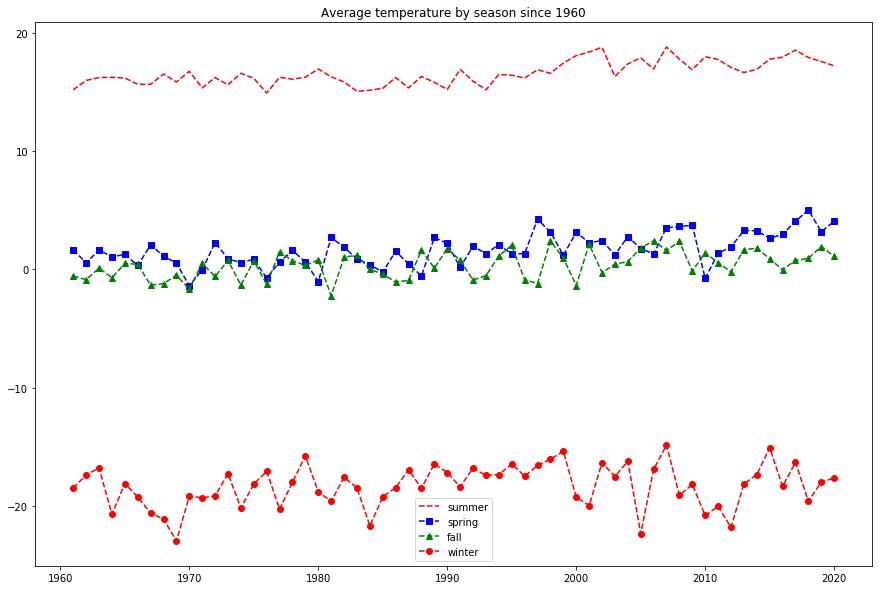

In [30]:
plt.figure(figsize=(15,10))
plt.title("Average temperature by season since 1960", fontdict=None, loc='center', pad=None)

plt.plot(" Year", "Temperature - (Celsius)", 'r--', data=weather[weather[" Statistics"] == "summer"], label = "summer")
plt.plot(" Year", "Temperature - (Celsius)", 'bs--', data=weather[weather[" Statistics"] == "spring"], label = "spring")
plt.plot(" Year", "Temperature - (Celsius)", 'g^--', data=weather[weather[" Statistics"] == "fall"], label = "fall")
plt.plot(" Year", "Temperature - (Celsius)", 'ro--', data=weather[weather[" Statistics"] == "winter"], label = "winter")

# show legend
plt.legend()

# show graph
plt.show()

We can see that average temperature of summer, spring and fall rises slightly

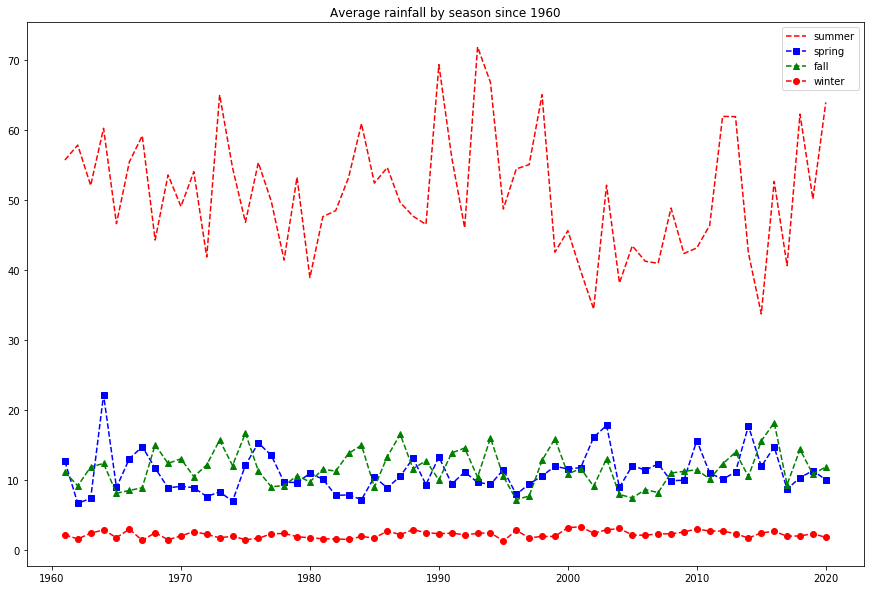

In [43]:
plt.figure(figsize=(15,10))
plt.title("Average rainfall by season since 1960", fontdict=None, loc='center', pad=None)

plt.plot(" Year", "Rainfall - (MM)", 'r--', data=weather[weather[" Statistics"] == "summer"], label = "summer")
plt.plot(" Year", "Rainfall - (MM)", 'bs--', data=weather[weather[" Statistics"] == "spring"], label = "spring")
plt.plot(" Year", "Rainfall - (MM)", 'g^--', data=weather[weather[" Statistics"] == "fall"], label = "fall")
plt.plot(" Year", "Rainfall - (MM)", 'ro--', data=weather[weather[" Statistics"] == "winter"], label = "winter")

# show legend
plt.legend()

# show graph
plt.show()

Difficult to say if average rainfall decreases on the graph above

Let's see by statistical method if there is a correlation between these two features

In [49]:
pd.DataFrame(pearsonr(weather["Temperature - (Celsius)"],weather["Rainfall - (MM)"]),
            index = ["pearson-coeff", "p-value"],
            columns = ["result"])

,result
pearson-coeff,8.436259e-01
p-value,3.213713e-66


The coefficient has a value of 0.8436 which means that the variables are strongly correlated

2. To see if the rise of temperature is correlated to the rise of number of animals

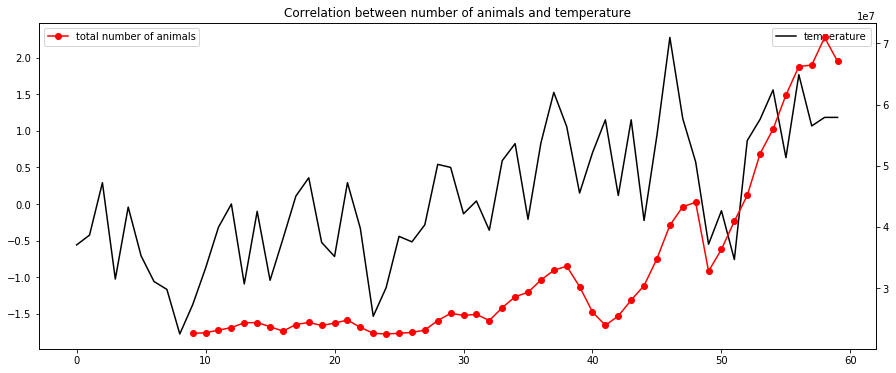

In [61]:
left_data = dataset["Temperature - (Celsius)"]
right_data = dataset["Number of head"]

fig, ax_left = plt.subplots(figsize=(15,6))
ax_right = ax_left.twinx()

plt.title("Correlation between number of animals and temperature", fontdict=None, loc='center', pad=None)

ax_left.plot(left_data, color='black', label = "temperature")
ax_right.plot(right_data, color='red', marker = 'o', label = "total number of animals")

ax_left.legend()
ax_right.legend()

In [63]:
dataset.corr(method ='pearson')

,Year,Temperature - (Celsius),Rainfall - (MM),Year,Number of head
Year,1.000000,0.690152,-0.090031,1.000000,0.813202
Temperature - (Celsius),0.690152,1.000000,-0.228096,0.670365,0.610732
Rainfall - (MM),-0.090031,-0.228096,1.000000,-0.018060,0.044004
Year,1.000000,0.670365,-0.018060,1.000000,0.813202
Number of head,0.813202,0.610732,0.044004,0.813202,1.000000


As we can see, there is a slight correlation (0.61) between the variables Temperature and Number of head

3. To see if the rise of number of goat is exceptional compared to the rise of other animals

As wee see in the graphs on Tableau software, number of sheep and goats inscreased well since 1990, but the rise of goats soared (analysis are made on Tableau software and graphs are available in the presentation document)

4. To see if there is a correlation between the rise of average temperature and the number of goats

In [88]:
dataset_goat.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'))

,Year,Temperature - (Celsius),Rainfall - (MM),Year,Number of head
Year,1.0,0.7,-0.15,1.0,0.95
Temperature - (Celsius),0.7,1.0,-0.27,0.68,0.76
Rainfall - (MM),-0.15,-0.27,1.0,-0.093,-0.14
Year,1.0,0.68,-0.093,1.0,0.95
Number of head,0.95,0.76,-0.14,0.95,1.0


We can see that there is a strong correlation between avg. temperature and number of goats

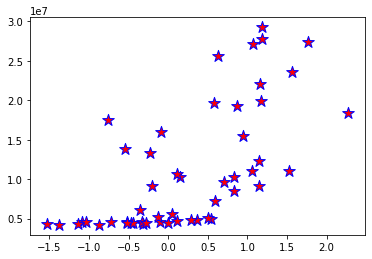

In [89]:
plt.scatter(dataset_goat["Temperature - (Celsius)"], dataset_goat["Number of head"], s = 150, c = 'red', marker = '*', edgecolors = 'blue')

What we said just before is more or less confirmed by the graph above